# สถิติการเขียนบทความบน Medium ในปี 2020 ของชาว ODDS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'tahoma'

In [3]:
df = pd.read_csv('./data/ODDS Medium Publication - 2020.csv', header=1)

In [4]:
df.head()

,Date,Article,Author
0,2020/01/02,ผลของการโพสต์บทความสัปดาห์ละอัน,Chokchai Phatharamalai
1,2020/01/05,Commit ทุกลมหายใจ,Pallat Anchaleechamaikorn
2,2020/01/09,ยิ้ม,Chokchai Phatharamalai
3,2020/01/09,Java Developer ลองจัดการ Version ด้วย SDK Man ...,Kawee Lertrungmongkol
4,2020/01/12,แปลกใหม่ != แตกต่าง,Jane.Makub


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     161 non-null    object
 1   article  161 non-null    object
 2   author   161 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [7]:
df['date_converted'] = pd.to_datetime(df.date, format='%Y/%m/%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            161 non-null    object        
 1   article         161 non-null    object        
 2   author          161 non-null    object        
 3   date_converted  161 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 5.2+ KB


## ทั้งหมดแล้วเราเขียนกันไปกี่บทความในปี 2020

In [80]:
df.count()[0]

161

## จำนวนบทความในแต่ละเดือน

In [9]:
df_count = df.groupby(df.date_converted.dt.month)[['date']].count().reset_index().rename(columns={'date_converted': 'month', 'date': 'count'})

In [10]:
import calendar

In [11]:
df_count['month_name'] = df_count['month'].apply(lambda x: calendar.month_abbr[x])

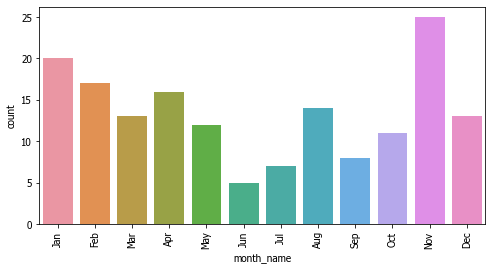

In [12]:
plt.figure(figsize=(8, 4))
chart = sns.barplot(data=df_count, x='month_name', y='count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## แต่ละคนเขียนคนละกี่บทความแล้วในปีนี้ (2020)

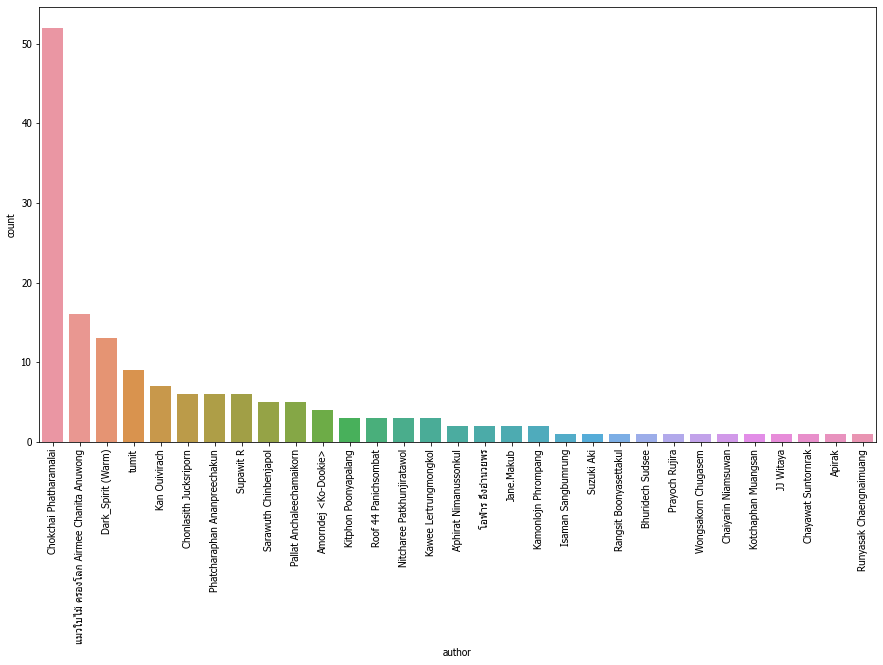

In [13]:
plt.figure(figsize=(15, 8))
chart = sns.countplot(data=df, x='author', order=df.author.value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## ในแต่ละเดือนแต่ละคนเขียนกันคนละกี่บทความนะ?

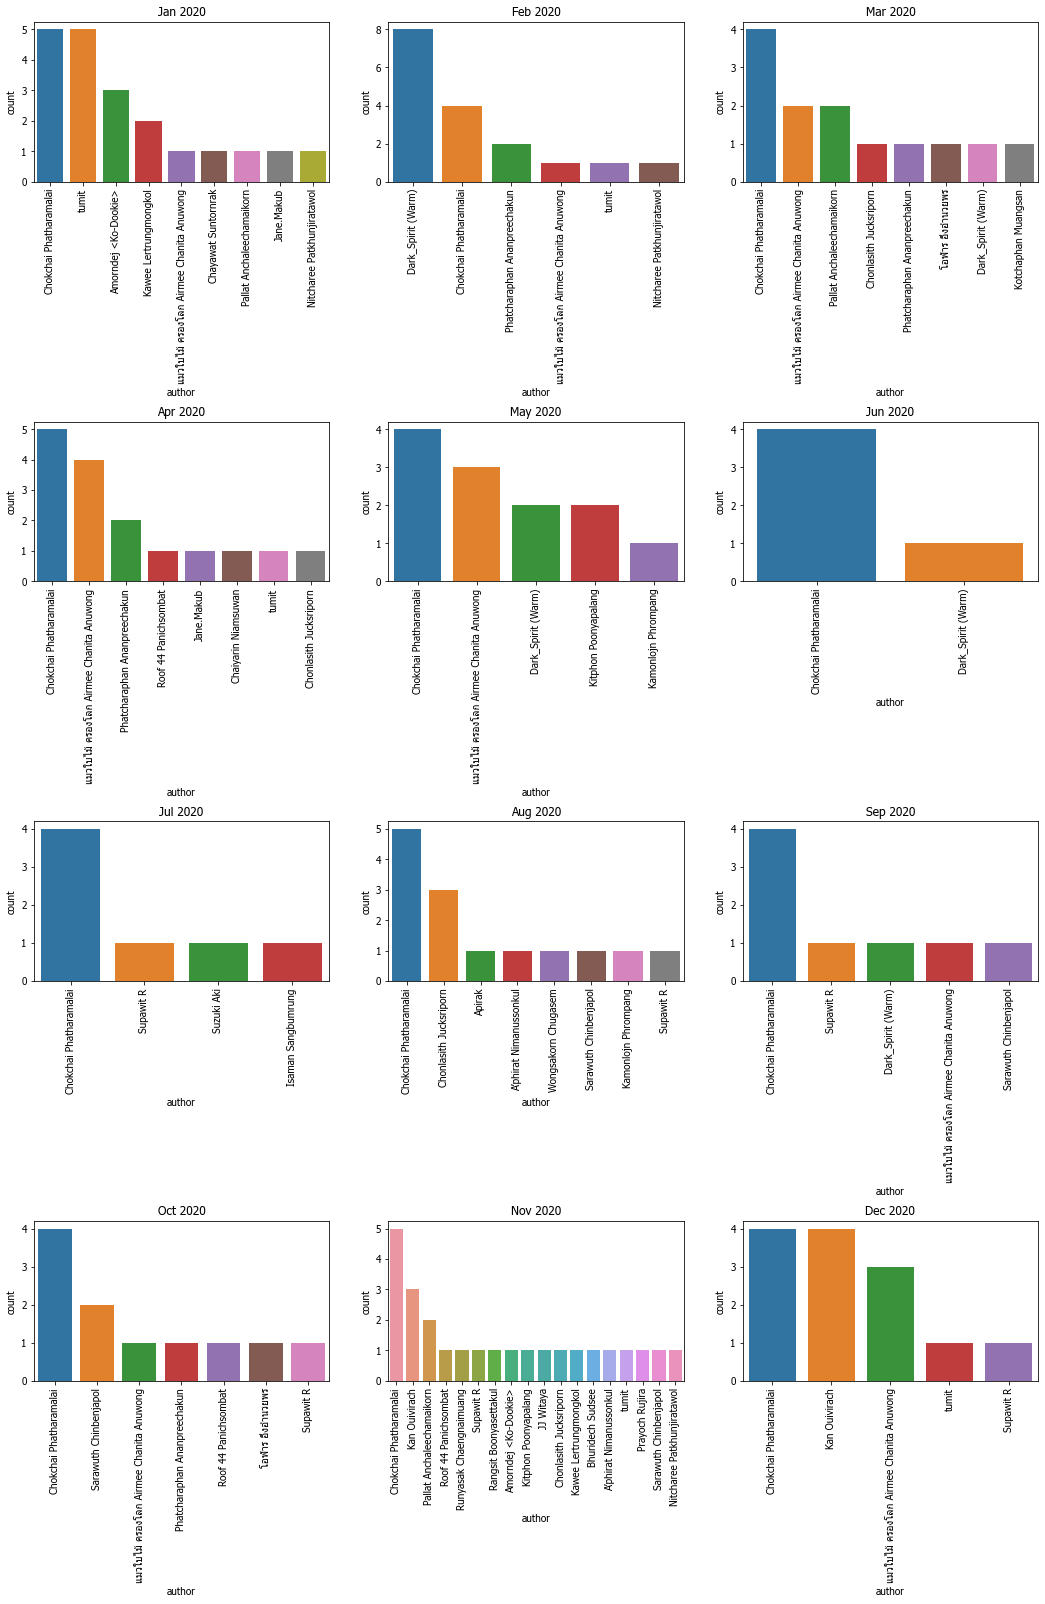

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year = 2020
nrows, ncols = 4, 3
fig = plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=1.5)
for index, month in enumerate(months):
    ax = fig.add_subplot(nrows, ncols, index + 1)
    ax.set_title(f'{month} 2020')
    df_each_month = df[df.date_converted.dt.month == index + 1]
    chart = sns.countplot(data=df_each_month, x='author', order=df_each_month.author.value_counts().index, ax=ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## 5 คนที่เขียนบทความเยอะสุด เค้าเขียนเฉลี่ยแล้วเดือนละกี่บทความ?

In [15]:
df.author.value_counts()[:5] / 12

Chokchai Phatharamalai                     4.333333
แมวใบไม้ ครองโลก Airmee Chanita Anuwong    1.333333
Dark_Spirit (Warm)                         1.083333
tumit                                      0.750000
Kan Ouivirach                              0.583333
Name: author, dtype: float64

## บทความทั้งหมดของ ODDS คร่าวๆ แล้วเค้าพูดถึงเรื่องอะไรกันบ้าง? (Word Cloud)

Credit: https://python3.wannaphong.com/2017/06/word-cloud-python.html

In [72]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from wordcloud import STOPWORDS, WordCloud

In [73]:
stopwords = thai_stopwords().union(set(STOPWORDS))

In [74]:
text = ' '.join(df.article)

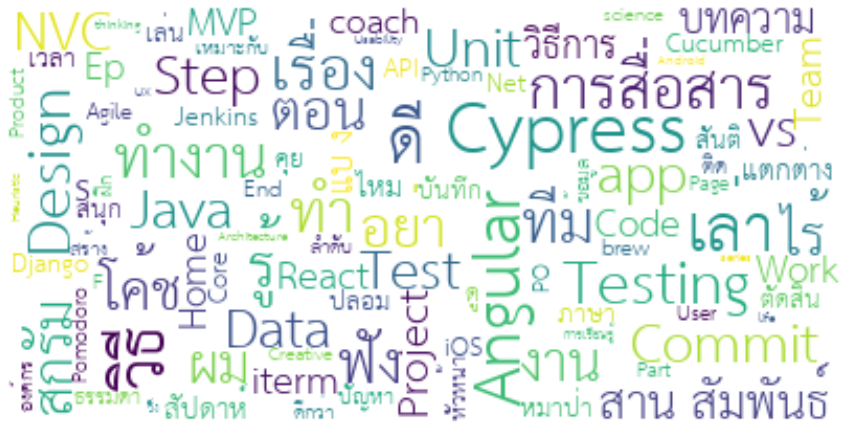

In [75]:
wordcloud = WordCloud(
    font_path='THSarabunNew.ttf',
    stopwords=stopwords,
    max_font_size=50, 
    max_words=100, 
    regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
    background_color='white').generate(' '.join(word_tokenize(text)))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### โค้ดไร้สาระอยู่ด้านล่างนี้ 👇

In [19]:
new_df = df.groupby([df.date_converted.dt.month, df.author]).count()[['article']].reset_index()

In [20]:
new_df.head()

,date_converted,author,article
0,1,Amorndej <Ko-Dookie>,3
1,1,Chayawat Suntornrak,1
2,1,Chokchai Phatharamalai,5
3,1,Jane.Makub,1
4,1,Kawee Lertrungmongkol,2


<AxesSubplot:xlabel='date_converted', ylabel='article'>

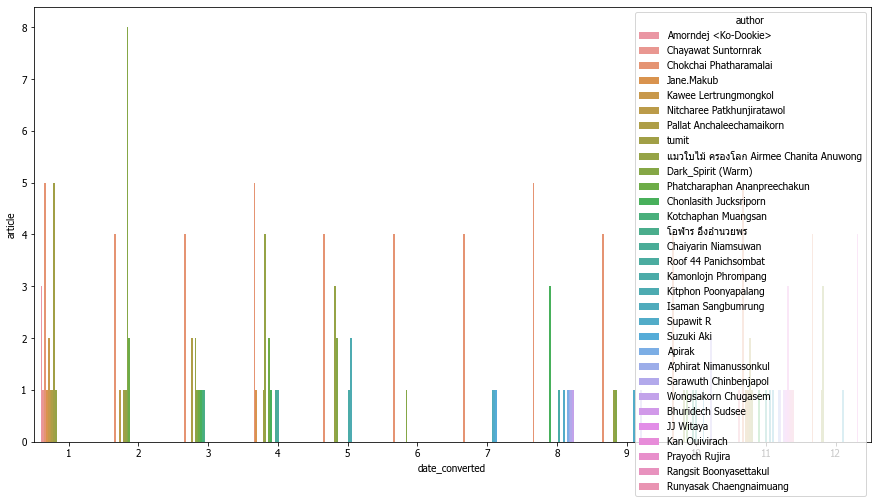

In [21]:
plt.figure(figsize=(15, 8))
sns.barplot(data=new_df, x='date_converted', y='article', hue='author')

<AxesSubplot:xlabel='date_converted', ylabel='author'>

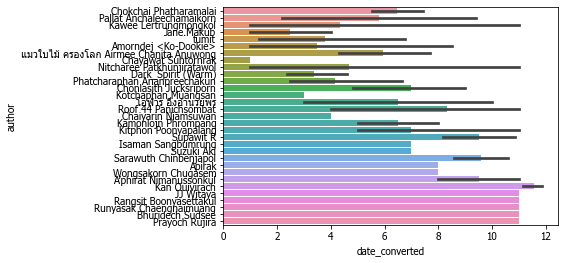

In [22]:
sns.barplot(data=df, x=df.date_converted.dt.month, y=df.author)